In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import seaborn as sns

In [2]:
dataset = sns.load_dataset('tips')

In [3]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
dataset = pd.get_dummies(dataset, columns = ['sex','smoker','day','time'], drop_first=True)

In [6]:
dataset.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [7]:
dataset.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

In [8]:
X = dataset[['tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']]
Y = dataset [['total_bill']]

In [9]:
Y.head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [11]:
X.head()

,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.01,2,True,True,False,False,True,True
1,1.66,3,False,True,False,False,True,True
2,3.50,3,False,True,False,False,True,True
3,3.31,2,False,True,False,False,True,True
4,3.61,4,True,True,False,False,True,True


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_pred = model.predict(X_test)

In [31]:
# Adjusted R2 
k = X.shape[1]
n = X.shape[0]

In [ ]:
# Let's check the accuracy of the model 

In [32]:
adj_r2 = 1- ((1-r2)*(n-1)/(n-k-1))

In [33]:
print (f"Mean Squared Error Value for the model is", mean_squared_error(Y_test,Y_pred))
print (f"Mean Absolute Error Value for the model is", mean_absolute_error(Y_test,Y_pred))
print (f"Root Mean Squared Error Value for the model is", np.sqrt(mean_squared_error(Y_test,Y_pred)))
r2 = r2_score(Y_test,Y_pred)
print (f"R Square or Coefficient of Determination for the model is", r2)
print (f"Adjusted R Squared Value for the model is", adj_r2)


Mean Squared Error Value for the model is 38.343678473354636
Mean Absolute Error Value for the model is 4.863809589455294
Root Mean Squared Error Value for the model is 6.192227262734681
R Square or Coefficient of Determination for the model is 0.5869500933627325
Adjusted R Squared Value for the model is 0.5728888199452936


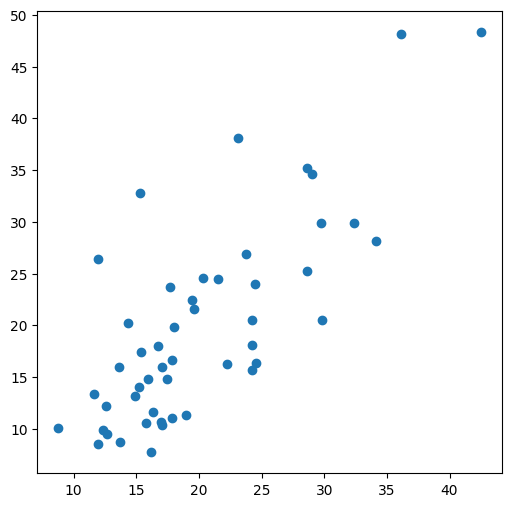

In [43]:
# Visualizations 
plt.figure(figsize=(6,6))
plt.scatter (Y_pred,Y_test)
#plt.plot(X_test, Y_pred, color='red', label='Regression Line', linewidth=2)
plt.show()